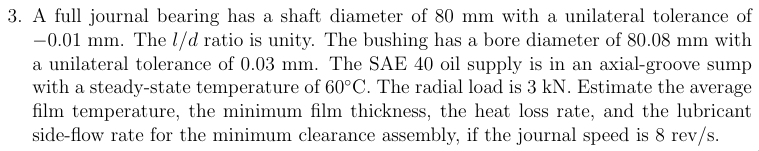

In [1]:
dmax = 80e-3
bmin = 80.08e-3

r = dmax/2

c = (bmin - dmax)/2

rc_ratio = r/c

l = 1*dmax #Since l/d ratio is 1

W = 3000

P = W/(l*dmax)  #this will be in Pascals

N = 8

Ts = 60
display(P) 

468750.0

The average film temperature is not known. So, the dynamic viscosity is also not known. 

We have to guess and iterate. 

We can use Fig. 12-2. Or, we can use the curve fit approximations for various SAE grade oils. 

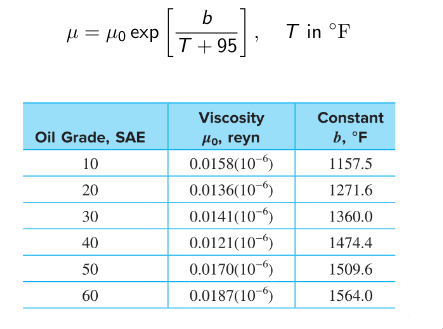

However, the curve fit and the parameter values are given in reyn and $^\circ$F. 

We write an alternate version of the curve fit approximation as follows:

\begin{gather*}
\mu = 6890 \mu_0 \exp \left[ \frac{b}{\left(\dfrac{9}{5}T +32 \right) + 95} \right] = 6890 \mu_0 \exp \left[ \frac{b}{\dfrac{9}{5}T + 127} \right]
\end{gather*}
where we note very carefully:
\begin{align*}
\mu &: \text{is in Pa$\cdot$s } \\
\mu_0 &: \text{is in reyn, as tabulated above} \\
b &: \text{is in $^\circ$F, as tabulated above} \\
T &: \text{is in $^\circ$C }
\end{align*}

For the SAE grade 40 oil, we have:

In [2]:
from math import exp

In [3]:
b = 1474.4
mu0 = 0.0121e-6

def mu(T):
    return 6890*mu0*exp( b / (9/5*T + 127) )

We will take our first guess as:

In [4]:
Tf = 100

In [5]:
mu(Tf)

0.010156634343215815

Note that this doesn't match with the value that can be read from Fig. 12-2. But we will use it. 

In [6]:
def Somm(T):
    mu = 6890*mu0*exp( b / (9/5*T + 127) )
    return (rc_ratio)**2*mu*N/P

In [7]:
S = Somm(Tf)

In [8]:
Tf_new = Tf
error = 10 #just a sufficiently large value to start the iterations
counter = 1

while error > 0.1:
    display(counter)
    mu = 6890*mu0*exp( b / (9/5*Tf_new + 127) )
    S = (rc_ratio)**2*mu*N/P
    display(S)
    
    DelT = (0.349109 + 6.00940*S + 0.047467*S**2)*(P/1e6)/0.120
    Tavg = Ts + DelT/2
    display(Tavg)
    
    error = Tf_new - Tavg
    Tf_new = (Tf_new + Tavg)/2
    display(Tf_new)
    
    counter = counter + 1

1

0.17333989279089737

62.71914839711224

81.35957419855612

2

0.3124823523479381

64.35854565211434

72.85905992533523

3

0.43015184980748866

65.74774682496636

69.3034033751508

4

0.4973740696945943

66.54252180995715

67.92296259255397

5

0.5272767742074596

66.89633371108478

67.40964815181937

6

0.5390095464161373

67.03520237700995

67.22242526441465

7

0.5433757290497389

67.08688687276012

67.15465606858739

8

0.5449678090451724

67.10573392943647

67.13019499901193

So, the average fluid temperature is 67.1$^\circ$C

In [9]:
Tf = 67.1
mu = 6890*mu0*exp( b / (9/5*Tf + 127) )
S = (rc_ratio)**2*mu*N/P
display(mu, S)

0.032007209202828506

0.5462563703949844